[-1, 25] [0.1730233430862426, 0.1730233430862426]
[20, 16, 12, 8, 4] [0.1680638045072555, 0.1702583283185959, 0.1742634177207946, 0.1625401079654693, 0.0750860199332237]
[12] [0.1863778978586197]
[12, 10] [0.1781757771968841, 0.1807902455329895]
[10, 8] [0.1967863589525222, 0.1776685863733291]
[8] [0.1675398498773574]
[8, 6, 4, 1] [0.1598774939775467, 0.1279124766588211, 0.0593657717108726, 0.0056987628340721]
[-1, 25] [0.9937534928321838, 0.9937534928321838]
[20, 16, 12, 8, 4] [0.9934666752815248, 0.9931145906448364, 0.9932453632354736, 0.9936714768409728, 0.9767125844955444]
[12] [0.9936712384223938]
[12, 10] [0.9930568337440492, 0.9934505224227904]
[10, 8] [0.9932374358177184, 0.9938520789146424]
[8] [0.9916632771492004]
[8, 6, 4, 1] [0.9876058101654052, 0.9850972890853882, 0.9589323401451112, 0.4682458937168121]
[-1, 25] [0.007304061204195, 0.007304061204195]
[20, 16, 12, 8, 4] [0.007335091009736, 0.0073312111198902, 0.0073380931280553, 0.0074334912933409, 0.0090970136225223]
[12] 

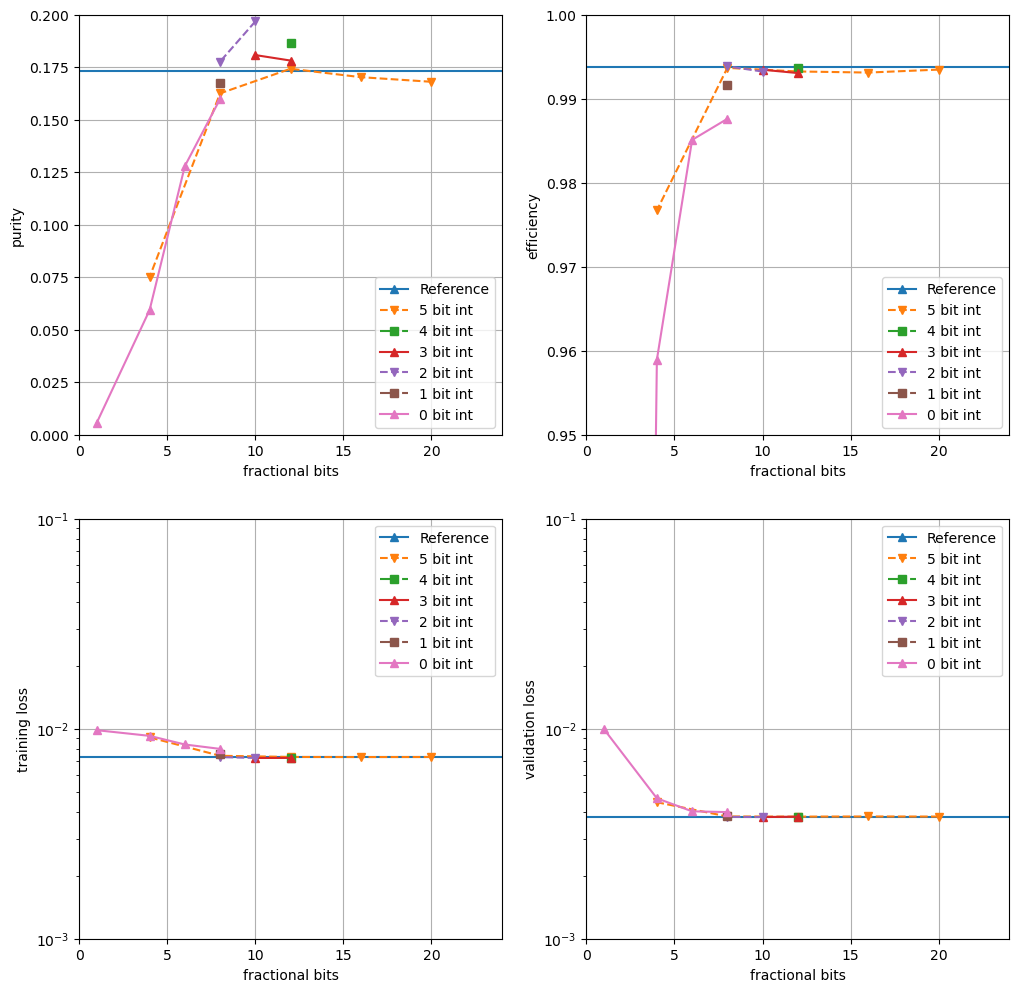

In [25]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
def filter_nan(arr): 

     """The way csv file is created for qnn networks, contain some 'nans'
    Therefore I created a function to remove 'nan' from the csv file array"""
     index =np.where( np.isnan(arr)==0)
     filter_arr = arr[index]
     return filter_arr;

# some constants we need
zoom = True

max_epoch = 30
min_xlim = 0
max_bits = 24
min_ylim = [0, 0, 1e-3, 1e-3]
if(zoom):
    min_ylim = [0, 0.95, 1e-3, 1e-3] # for zoom
max_ylim = [0.2, 1, 0.1, 0.1]
    

reference_list = [48,48]
filenum_list1 = [55, 56, 57, 58, 59] # fixed point with 5 integer bits
filenum_list2 = [62] # fixed point with 4 integer bits
filenum_list3 = [60, 63] # fixed point 3 integer 
filenum_list4 = [64, 65] # fixed point 2 integer 
filenum_list5 = [66] # fixed point 1 integer 
filenum_list6 = [67, 68, 69, 70] # fixed point, no integer bits
bit_reference_list = [-1,max_bits+1]
bit_filenum_list1 = [20, 16, 12, 8, 4] # fixed point with 5 integer bits
bit_filenum_list2 = [12] # fixed point with 4 integer bits
bit_filenum_list3 = [12, 10] # fixed point 3 integer 
bit_filenum_list4 = [10, 8] # fixed point 2 integer 
bit_filenum_list5 = [8] # fixed point 1 integer 
bit_filenum_list6 = [8, 6, 4, 1] # fixed point, no integer bits
filenum_lists = [reference_list, filenum_list1, filenum_list2, filenum_list3, filenum_list4, filenum_list5, filenum_list6]
bit_filenum_lists = [bit_reference_list, bit_filenum_list1, bit_filenum_list2, bit_filenum_list3, bit_filenum_list4, bit_filenum_list5, bit_filenum_list6]



##initializing figure
#fig = plt.figure(figsize=(12,12))
#ax1 = fig.add_subplot(221)
#ax2 = fig.add_subplot(222)
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)
#ax_list = [ax1, ax2, ax3, ax4]
obs = {0:"pur",1:"eff",2:"train_loss",3:"val_loss"}  ##observations that we are interested in
label_obs = {0:"purity",1:"efficiency",2:"training loss",3:"validation loss"}  ##observations that we are interested in


label_filenum = {46:"Binarized ints, thr = 0",
                 48:"Reference", 
                 50:"Quantized ints, thr = 0",
                 51:"Quantized ints, thr = 1e-6",
                 52:"Quantized ints, thr = 1e-5",
                 53:"Quantized ints, thr = 1e-7",
                 54:"Binarized ints, thr = 1e-6",
                 55:"Fixed point, sign + <5,20>, scale = 1",
                 56:"Fixed point, sign + <5,16>, scale = 1",
                 57:"Fixed point, sign + <5,12>, scale = 1",
                 58:"Fixed point, sign + <5,8>, scale = 1",
                 59:"5 bit int",
                 60:"Fixed point, sign + <3,12>, scale = 1",
                 62:"4 bit int",
                 63:"3 bit int",
                 64:"Fixed point, sign + <2,10>, scale = 1",
                 65:"2 bit int",
                 66:"1 bit int",
                 67:"Fixed point, sign + <0,8>, scale = 1",
                 68:"Fixed point, sign + <0,6>, scale = 1",
                 69:"Fixed point, sign + <0,4>, scale = 1",
                 70:"0 bit int"
                }
linestyles = ['solid', 'dashed', 'dashdot']
markerstyles = ['^', 'v', 's']
labelloc = [4, 4, 1, 1]

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax_list = [ax1, ax2, ax3, ax4]
for j in range (0,4):
    idfile = 0
    for filenum_list, bit_filenum_list in zip (filenum_lists, bit_filenum_lists):
        ax = ax_list[j]
        ax.set_xlabel("fractional bits")
        ax.set_ylabel(label_obs[j])
        ya = []
        for filenum in filenum_list:
            df = pd.read_csv(f"metrics_{filenum}.csv")  ##reading the csv file
            ya.append(filter_nan(np.array(df[obs[j]]))[max_epoch-1])  ##accessing desirable array and passing it through the filter nan function
        print(bit_filenum_list, ya)
        ax.plot(bit_filenum_list,ya,label = label_filenum[filenum],alpha=1, linestyle=linestyles[idfile%3], marker = markerstyles[idfile%3]) ##plotting 
        idfile = idfile + 1
        ax.grid(True)  
        ax.legend(loc=labelloc[j], prop={'size': 10})
        # plt.suptitle(inputs + "  Input bit width = weight_bit width,Bias-False")  ##this creates the title
        # plt.savefig(inputs+".jpg")  ##this commands saves the figure
        ax.set_xlim([min_xlim,max_bits])
        ax.set_ylim([min_ylim[j],max_ylim[j]])
        if(j > 1):
            ax.set_yscale('log')
        ax_list[j] = ax
        

#plt.show()
if(zoom):
    plt.savefig(f"summary_zoom.pdf")
else:
    plt.savefig(f"summary.pdf")


 
